In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
#데이터 불러옴.
df = pd.read_csv('/content/drive/MyDrive/game.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
#데이터 전처리 시작.
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
#0.03M 같은경우 해석이 난해하기때문에 없앰.
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'],errors='coerce')
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'],errors='coerce')
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'],errors='coerce')
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'],errors='coerce')

In [8]:
df['total_sales']= df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [9]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
total_sales    float64
dtype: object

In [10]:
df.isnull().sum()

Name             0
Platform         0
Year             0
Genre            0
Publisher        0
NA_Sales       191
EU_Sales       195
JP_Sales       196
Other_Sales    197
total_sales    765
dtype: int64

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
total_sales    0
dtype: int64

In [13]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [14]:
df= df[df.Year>1000]

In [15]:
df = df.sort_values('Year')
#데이터 전처리 완료.
#2016년도 자료가 마지막이라고 봐도 될정도로 2017년도 자료가 미흡하다.

In [16]:
#지역별 선호도 조사 시작.

In [17]:
n_t = df['NA_Sales'].sum()
n_t

4055.22

In [18]:
e_t = df['EU_Sales'].sum()
e_t

2251.7000000000003

In [19]:
j_t = df['JP_Sales'].sum()
j_t

1192.1399999999999

In [20]:
o_t = df['Other_Sales'].sum()
o_t

743.86

In [21]:
area = df.drop(['Name','Platform','Year','Publisher','total_sales'],axis=1)
area

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5938,Misc,1.07,0.07,0.00,0.01
13133,Action,0.32,0.02,0.00,0.00
14264,Fighting,0.72,0.04,0.00,0.01
10121,Misc,0.99,0.05,0.00,0.01
15012,Shooter,2.56,0.17,0.00,0.03
...,...,...,...,...,...
8178,Action,0.00,0.00,0.02,0.00
1070,Fighting,0.02,0.00,0.05,0.00
10107,Role-Playing,0.00,0.00,0.03,0.00
5310,Action,0.00,0.00,0.01,0.00


In [22]:
area.rename(columns = {'NA_Sales':'NA','EU_Sales':'EU','JP_Sales':'JP','Other_Sales':'Other'},inplace=True)
area

,Genre,NA,EU,JP,Other
5938,Misc,1.07,0.07,0.00,0.01
13133,Action,0.32,0.02,0.00,0.00
14264,Fighting,0.72,0.04,0.00,0.01
10121,Misc,0.99,0.05,0.00,0.01
15012,Shooter,2.56,0.17,0.00,0.03
...,...,...,...,...,...
8178,Action,0.00,0.00,0.02,0.00
1070,Fighting,0.02,0.00,0.05,0.00
10107,Role-Playing,0.00,0.00,0.03,0.00
5310,Action,0.00,0.00,0.01,0.00


In [23]:
na_preference = area.groupby('Genre').NA.sum()
preference = pd.DataFrame(na_preference)
preference = preference.sort_values('NA',ascending=False)
print(preference)

                  NA
Genre               
Action        801.89
Sports        633.87
Shooter       544.63
Platform      410.96
Misc          380.36
Racing        334.14
Role-Playing  283.86
Fighting      210.51
Simulation    173.64
Puzzle        118.40
Adventure      97.29
Strategy       65.67


In [24]:
preference['Genre'] = preference.index

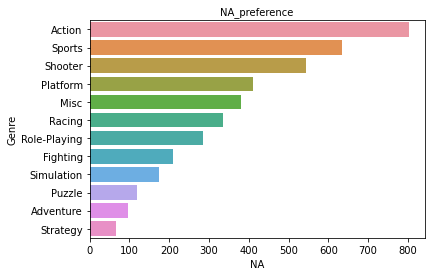

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('NA_preference',fontsize=10)
sns.barplot(x = 'NA', y = 'Genre', data = preference,)
plt.show()

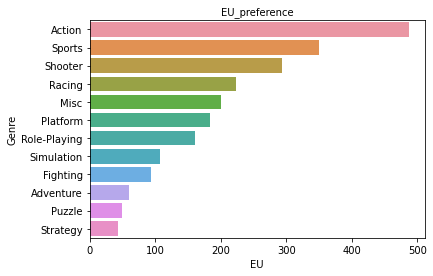

In [26]:
eu_preference = area.groupby('Genre').EU.sum()
eupreference = pd.DataFrame(eu_preference)
eupreference['Genre'] = eupreference.index
eupreference = eupreference.sort_values('EU',ascending=False)
plt.title('EU_preference',fontsize=10)
sns.barplot(x = 'EU', y = 'Genre', data = eupreference)
plt.show()

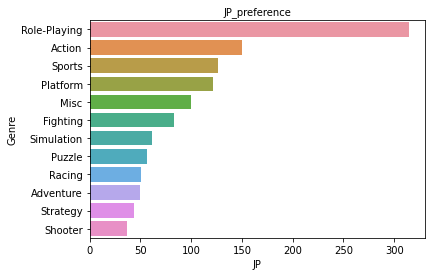

In [27]:
jp_preference = area.groupby('Genre').JP.sum()
jppreference = pd.DataFrame(jp_preference)
jppreference['Genre'] = jppreference.index
jppreference = jppreference.sort_values('JP',ascending=False)
plt.title('JP_preference',fontsize=10)
sns.barplot(x = 'JP', y = 'Genre', data = jppreference)
plt.show()

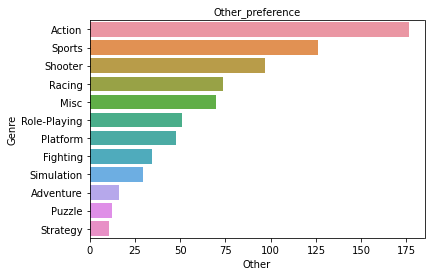

In [28]:
Other_preference = area.groupby('Genre').Other.sum()
Otherpreference = pd.DataFrame(Other_preference)
Otherpreference['Genre'] = Otherpreference.index
Otherpreference = Otherpreference.sort_values('Other',ascending=False)
plt.title('Other_preference',fontsize=10)
sns.barplot(x = 'Other', y = 'Genre', data = Otherpreference)
plt.show()

In [30]:
eupreference

,EU,Genre
Genre,,
Action,486.60,Action
Sports,349.85,Sports
Shooter,293.38,Shooter
Racing,222.66,Racing
Misc,200.14,Misc
Platform,184.11,Platform
Role-Playing,160.10,Role-Playing
Simulation,106.97,Simulation
Fighting,94.18,Fighting


In [31]:
Otherpreference

,Other,Genre
Genre,,
Action,176.14,Action
Sports,126.13,Sports
Shooter,96.68,Shooter
Racing,73.48,Racing
Misc,69.97,Misc
Role-Playing,50.86,Role-Playing
Platform,47.88,Platform
Fighting,34.33,Fighting
Simulation,29.49,Simulation


In [32]:
#지역별 선호도 조사 결과.
#북미,유럽,기타 나라에선 선호도가 거의 비슷하게 나타남. 일본에서만 롤플레잉게임이 인기를 끌고있음.
#롤플레잉 게임이 인기인 일본에서도 액션게임은 2순위. 그러므로 액션게임을 출시하는 방향으로 선택하는것이 좋아보임.

In [33]:
#다음으로 '최근 게임의 트렌드' 에 대한 분석

In [34]:
#최근 인기 장르 분석

In [35]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
5938,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
13133,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34
14264,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
10121,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05
15012,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
...,...,...,...,...,...,...,...,...,...,...
8178,Sengoku Otome: Legend Battle,PSV,2016.0,Action,Unknown,0.00,0.00,0.02,0.00,0.02
1070,Guilty Gear Xrd -Revelator-,PS4,2016.0,Fighting,PQube,0.02,0.00,0.05,0.00,0.07
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [36]:
year = df.drop(['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
year

ye = year.groupby(['Year'])
ye1 = pd.DataFrame(ye)
ye1

,0,1
0,1980.0,Platform Year Genre Publisher ...
1,1981.0,Platform Year Genre ...
2,1982.0,Platform Year Genre ...
3,1983.0,Platform Year Genre Publishe...
4,1984.0,Platform Year Genre Pub...
5,1985.0,Platform Year Genre P...
6,1986.0,Platform Year Genre ...
7,1987.0,Platform Year Genre ...
8,1988.0,Platform Year Genre ...
9,1989.0,Platform Year Genre ...


In [37]:
year1= year[year['Year']>=2013]
year1 = year1.sort_values('Year')

In [38]:
year1

,Platform,Year,Genre,Publisher,total_sales
11574,3DS,2013.0,Role-Playing,GungHo,1.51
12389,PSV,2013.0,Fighting,Tecmo Koei,0.10
6956,X360,2013.0,Action,Activision,0.46
948,X360,2013.0,Simulation,Microsoft Game Studios,0.10
10643,PS3,2013.0,Racing,Sony Computer Entertainment,3.65
...,...,...,...,...,...
10215,PS3,2016.0,Role-Playing,Nippon Ichi Software,0.07
13139,PS4,2016.0,Action,Capcom,0.01
5310,PSV,2017.0,Action,Idea Factory,0.01
10107,PS4,2017.0,Role-Playing,Sega,0.03


In [57]:
genre = year1.groupby(['Year','Genre']).total_sales.sum()
genre1 = pd.DataFrame(genre)
genre2 = genre1.reset_index()
genre1
plt.rcParams["figure.figsize"] = (14,14)

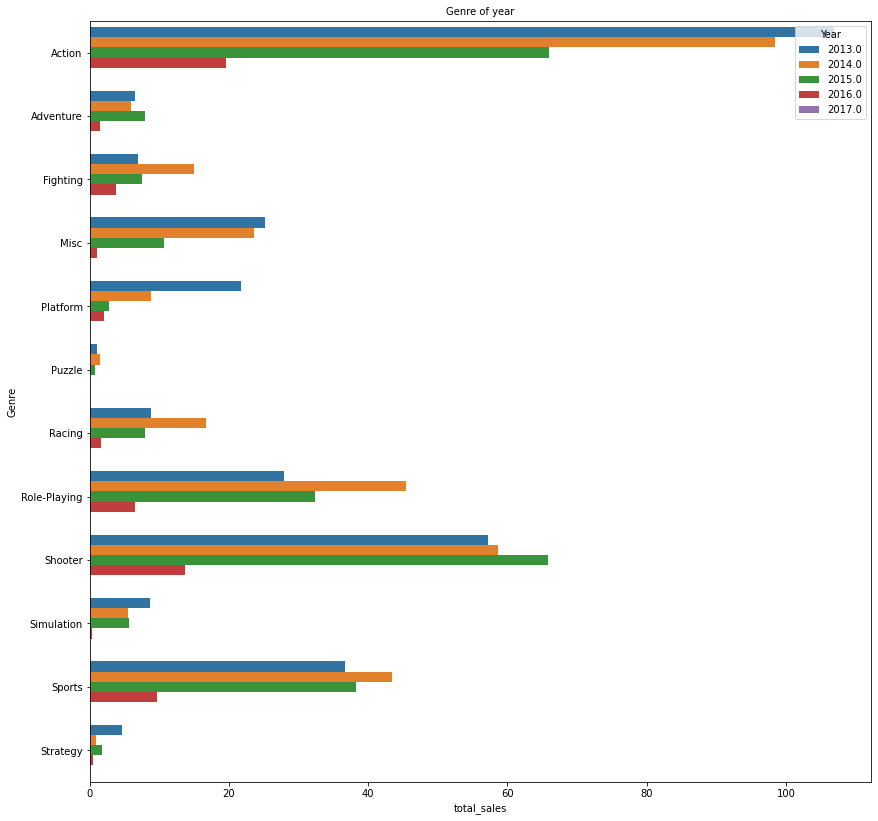

In [58]:
plt.title('Genre of year',fontsize=10)
sns.barplot(x ='total_sales', y = 'Genre', data = genre2,hue = 'Year')
plt.show()

In [41]:
plat = year1.groupby(['Year','Platform']).total_sales.sum()
plat1 = pd.DataFrame(plat)
plat2 = plat1.reset_index()
plat1

total_sales
Year   Platform             
2013.0 3DS             37.99
       DS               1.96
       PC              10.69
       PS3            111.55
       PS4             21.13
       PSP              2.96
       PSV             12.56
       Wii              9.10
       WiiU            19.46
       X360            68.86
       XOne            15.77
2014.0 3DS             43.11
       DS               0.02
       PC              13.28
       PS3             47.81
       PS4             96.30
       PSP              0.22
       PSV             13.59
       Wii              4.43
       WiiU            22.11
       X360            36.33
       XOne            46.81
2015.0 3DS             26.39
       PC               8.03
       PS3             17.72
       PS4            103.51
       PSP              0.12
       PSV              6.53
       Wii              1.56
       WiiU            13.18
       X360            12.64
       XOne            57.59
2016.0 3DS              6.21
       PC               2.44
       PS3              2.49
       PS4             29.57
       PSV              3.08
       WiiU             3.28
       X360             0.83
       XOne            12.34
2017.0 PS4              0.03
       PSV              0.02

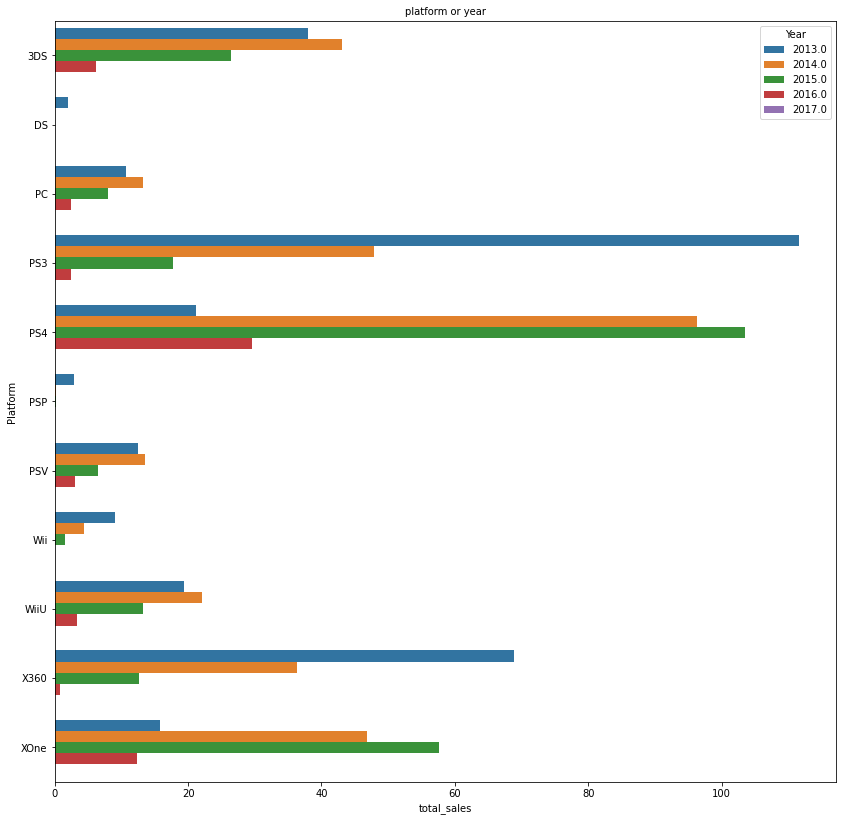

In [59]:
plt.title('platform or year',fontsize=10)
sns.barplot(x ='total_sales', y = 'Platform', data = plat2,hue = 'Year')
plt.show()

In [43]:
#장르만 봤을때는 action ,shooter ,sport 순으로 출고량이 높다.
#플랫폼으로 구분해보면 13년도 ps3 x360 ps4순이며
#13년도 ps3 x360 3ds
#14년도 ps4 ps3 3ds XOne
#15년도 ps4 XOne 3ds
#16년도 ps4 XOne 3ds 순이다.
#종합해 봤을때 플랫폼은 ps4 / XOne, 장르는 action/shotter 으로 출시하는것이 효과적일것이다.
#지역별 선호도 조사 결과.
#북미,유럽,기타 나라에선 선호도가 거의 비슷하게 나타남. 일본에서만 롤플레잉게임이 인기를 끌고있음.
#롤플레잉 게임이 인기인 일본에서도 액션게임은 2순위. 그러므로 액션게임을 출시하는 방향으로 선택하는것이 좋아보임.

In [44]:
top_sales = df.sort_values('total_sales',ascending=False)
top_sales = top_sales.head(100)
#출고량 높은 게임 top 100 추출 후 플랫폼,장르,개발사 별로 분류 및 시각화.

In [45]:
top_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
11292,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
4211,Mario Kart 8,WiiU,2014.0,Racing,Nintendo,3.13,2.07,1.27,0.49,6.96
8002,Mario Kart: Double Dash!!,GC,2003.0,Racing,Nintendo,4.12,1.77,0.87,0.19,6.95
6552,Just Dance 4,Wii,2012.0,Misc,Ubisoft,4.14,2.21,0.00,0.56,6.91


In [46]:
sales = top_sales.drop(['Name','Platform','Year','Genre','Publisher'],axis=1)
sales.dtypes

NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
total_sales    float64
dtype: object

In [47]:
tf = top_sales.groupby(['Publisher']).total_sales.sum()

In [48]:
tf1 = pd.DataFrame(tf)
tf1 = tf1.sort_values('total_sales',ascending=False)
tf2 = tf1.reset_index()

In [49]:
tf2

,Publisher,total_sales
0,Nintendo,848.49
1,Activision,173.22
2,Take-Two Interactive,112.77
3,Sony Computer Entertainment,97.47
4,Microsoft Game Studios,61.40
5,Electronic Arts,53.85
6,Ubisoft,33.97
7,Sega,8.05
8,SquareSoft,7.86
9,Atari,7.81


In [50]:
#top 100 개발사별 분석결과.tf1

In [51]:
tg = top_sales.groupby(['Genre']).total_sales.sum()
tg1 = pd.DataFrame(tg)
tg1 = tg1.sort_values('total_sales',ascending=False)
tg2 = tg1.reset_index()
tg2

,Genre,total_sales
0,Shooter,254.90
1,Platform,239.71
2,Sports,183.90
3,Racing,159.18
4,Role-Playing,148.75
5,Action,140.24
6,Misc,131.66
7,Simulation,54.24
8,Puzzle,53.37
9,Fighting,34.72


In [52]:
#top100의 'Genre' 최근 게임트렌드와는 다른 경향을보임.

In [53]:
ty = top_sales.groupby(['Year']).total_sales.sum()
ty1 = pd.DataFrame(ty)
ty2 = ty1.sort_values('total_sales',ascending=False)
ty2 = ty2.reset_index()
ty2
#년도별 출고량 분석.

,Year,total_sales
0,2006.0,167.43
1,2009.0,135.10
2,2005.0,103.70
3,2008.0,85.70
4,2007.0,81.19
5,2012.0,79.97
6,2010.0,77.18
7,2011.0,68.73
8,2013.0,57.28
9,2004.0,51.36


In [54]:
tp = top_sales.groupby(['Platform']).total_sales.sum()
tp1 = pd.DataFrame(tp)
tp1 = tp1.sort_values('total_sales',ascending=False)
tp2 = tp1.reset_index()
tp2
#플랫폼별 총판매량. top100기준.

,Platform,total_sales
0,Wii,343.93
1,DS,191.86
2,X360,147.52
3,PS3,125.63
4,GB,114.05
5,PS2,91.92
6,NES,85.83
7,3DS,60.70
8,PS,59.90
9,PS4,56.96


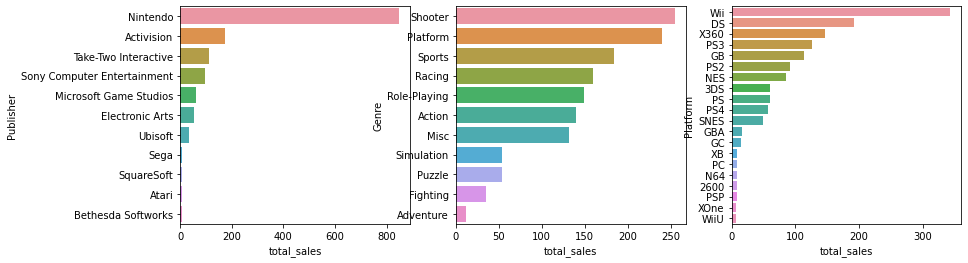

In [55]:
fig, ax = plt.subplots(ncols=3)
sns.barplot(x ='total_sales', y = 'Publisher', data = tf2 , ax=ax[0])
sns.barplot(x ='total_sales', y = 'Genre', data = tg2 , ax=ax[1])
sns.barplot(x ='total_sales', y = 'Platform', data = tp2 , ax=ax[2])
plt.show()
#출고량이 높은 상위 100개의 게임들. 장르,플랫폼,개발사 별로 분류.

In [56]:
#2013년도~2017년도 경향을 살펴봤을때 게임제작회사는 종류가 너무 다양해서 트렌드파악이 어려워 2015~2017로 축소후 파악.
#전체적으로 봤을때 모든 부분에서 출고량은 떨어지고 있는 추세다.
#장르만 봤을때는 action ,shooter ,sport 순으로 출고량이 높다.
#플랫폼으로 구분해보면 13년도 ps3 x360 ps4순이며
#14년도 ps4 ps3 3ds XOne
#15년도 ps4 XOne 3ds
#16년도 ps4 XOne 3ds 순이다.
#종합해 봤을때 플랫폼은 ps4 / XOne, 장르는 action/shotter 으로 출시하는것이 효과적일것이다.
#지역별 선호도 조사 결과.
#북미,유럽,기타 나라에선 선호도가 거의 비슷하게 나타남. 일본에서만 롤플레잉게임이 인기를 끌고있음.
#롤플레잉 게임이 인기인 일본에서도 액션게임은 2순위. 그러므로 액션게임을 출시하는 방향으로 선택하는것이 좋아보임.
#출고량 높은 게임들은 최근 트렌드나 , 지역별 선호도 조사 결과와 전혀 다른 모습을 보임.
#개발사의 대부분이 닌텐도인것으로 보아, 닌텐도 게임들이 출고량이 많은것을 확인할수 있음.